## CAR PRICE PREDICTION

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [2]:
df = pd.read_csv("dataset/cardekho.csv")

In [3]:
df.shape

(8128, 12)

In [4]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [7]:
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [8]:
df.rename(columns={'mileage(km/ltr/kg)': 'mileage'}, inplace=True)

In [9]:
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

In [10]:
# Impute missing values with mean for numeric columns
numeric_cols = ['mileage', 'engine', 'max_power', 'seats']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Confirm the NaN values are filled
print(df.isna().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


In [11]:
df.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           382
engine            122
max_power         320
seats              10
dtype: int64

# EDA

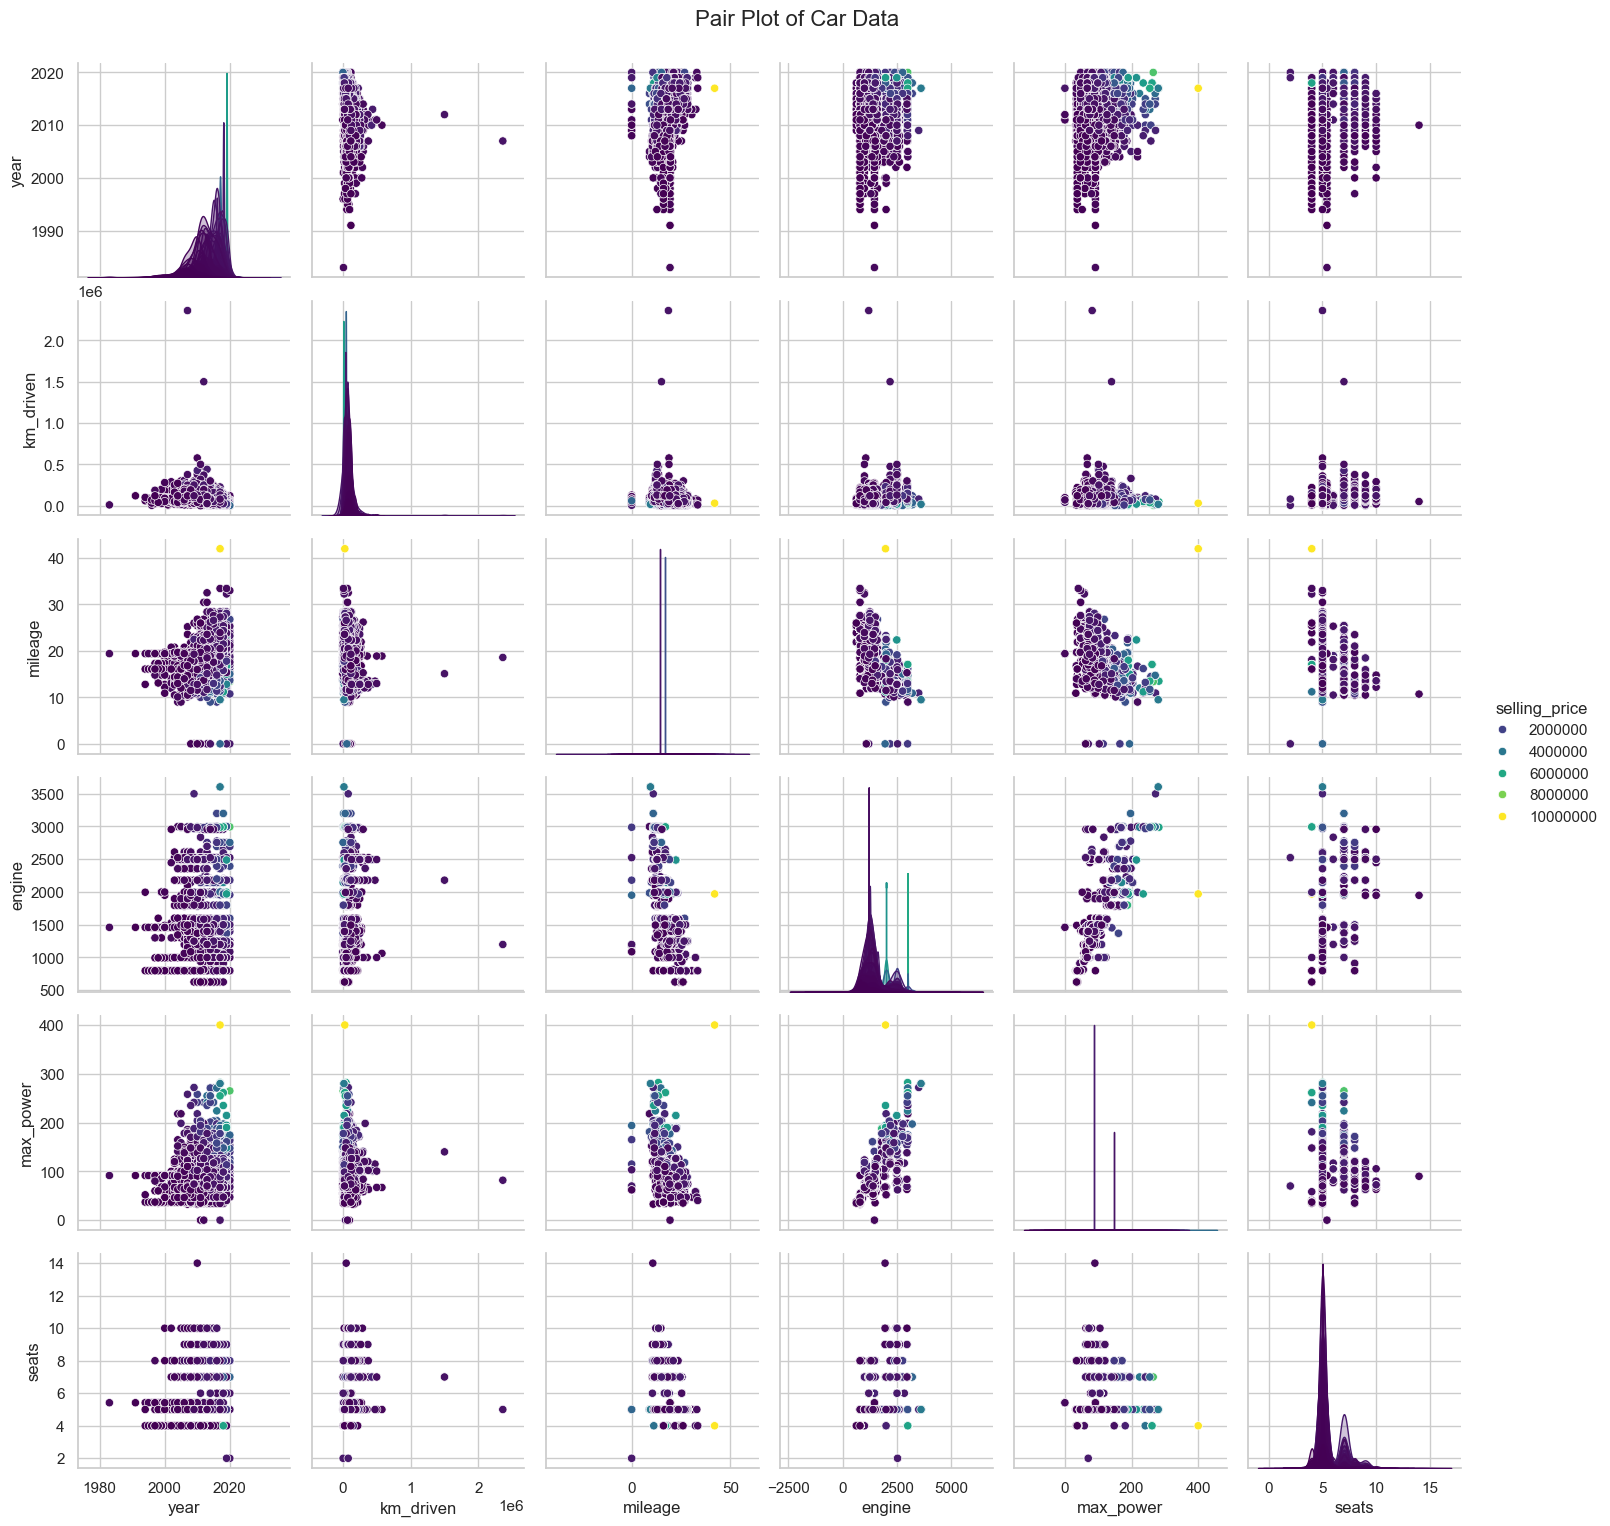

In [12]:
columns_to_include = ['year', 'selling_price', 'km_driven', 'fuel', 'mileage', 'engine', 'max_power', 'seats']
sns.set(style="whitegrid")
pairplot = sns.pairplot(df[columns_to_include], hue='selling_price',palette="viridis", height=2.5)
plt.suptitle("Pair Plot of Car Data", y=1.02, fontsize=16)
pairplot.savefig('images\pair_plot.png') 
plt.show()

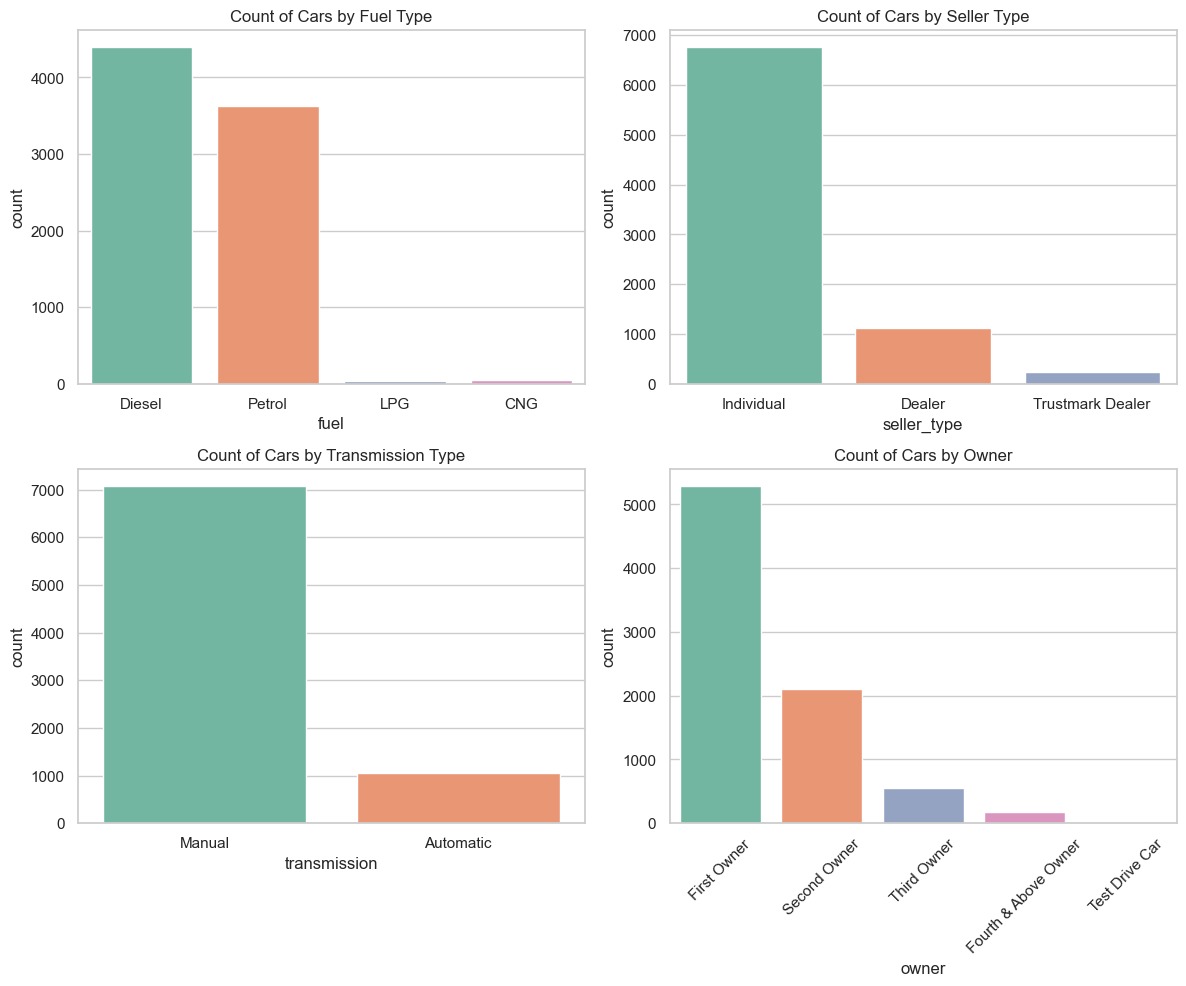

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.countplot(x='fuel', data=df, hue='fuel', palette='Set2', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Count of Cars by Fuel Type')

sns.countplot(x='seller_type', data=df, hue='seller_type', palette='Set2', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Count of Cars by Seller Type')

sns.countplot(x='transmission', data=df, hue='transmission', palette='Set2', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Count of Cars by Transmission Type')

sns.countplot(x='owner', data=df, hue='owner', palette='Set2', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Count of Cars by Owner')
plt.xticks(rotation=45)
plt.tight_layout(pad=1.0)  # Adjust the padding between plots
plt.show()


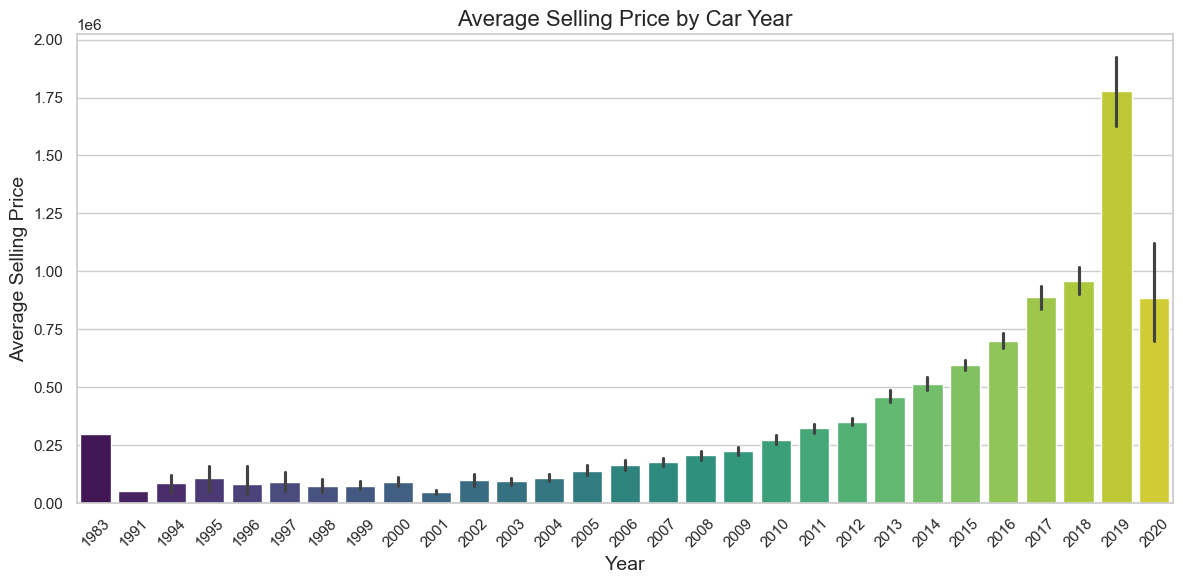

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='selling_price', data=df, palette='viridis')
plt.title('Average Selling Price by Car Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


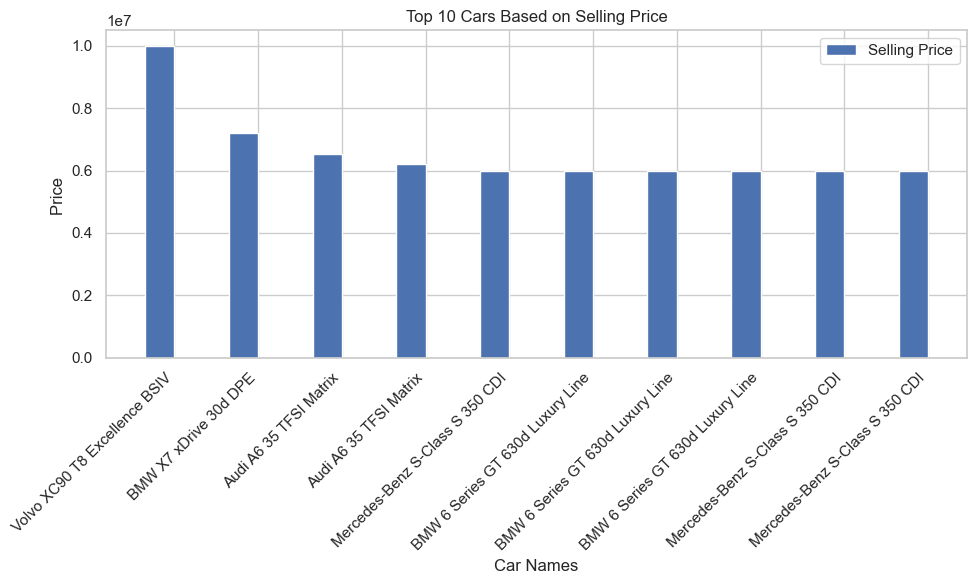

In [16]:
df_sorted = df.sort_values(by='selling_price', ascending=False)
top_10_df = df_sorted.head(10)

car_names = top_10_df['name']
selling_prices = top_10_df['selling_price']

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(car_names))

bar1 = ax.bar(index, selling_prices, bar_width, label='Selling Price')

ax.set_xlabel('Car Names')
ax.set_ylabel('Price ')
ax.set_title('Top 10 Cars Based on Selling Price')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(car_names, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

## Model Building and Evaluation

In [17]:
label_encoders = {
    'name':LabelEncoder(),
    'fuel': LabelEncoder(),
    'seller_type': LabelEncoder(),
    'transmission': LabelEncoder(),
    'owner':LabelEncoder()
}
df['name'] = label_encoders['name'].fit_transform(df['name'])
df['fuel'] = label_encoders['fuel'].fit_transform(df['fuel'])
df['seller_type'] = label_encoders['seller_type'].fit_transform(df['seller_type'])
df['transmission'] = label_encoders['transmission'].fit_transform(df['transmission'])
df['owner'] = label_encoders['owner'].fit_transform(df['owner'])

In [18]:
# Features and target
X = df.drop(['selling_price'],axis=1)
y = df['selling_price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Regressor

In [20]:
# Training the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Linear Regression

In [21]:
# Training the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

In [23]:
# Evaluation
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {rf_mse:.2f}')
print(f'R-squared: {rf_r2:.2f}')

Mean Squared Error: 19067988297.17
R-squared: 0.97


In [24]:
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f'Mean Squared Error: {lr_mse:.2f}')
print(f'R-squared: {lr_r2:.2f}')

Mean Squared Error: 205149254691.90
R-squared: 0.69


In [25]:
# Compare and save the best model
if rf_r2 > lr_r2:
    best_model = rf_model
    model_name = "Random Forest"
else:
    best_model = lr_model
    model_name = "Linear Regression"

In [26]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [27]:
print(f"The best model is {model_name} and has been saved as 'best_model.pkl'.")

The best model is Random Forest and has been saved as 'best_model.pkl'.


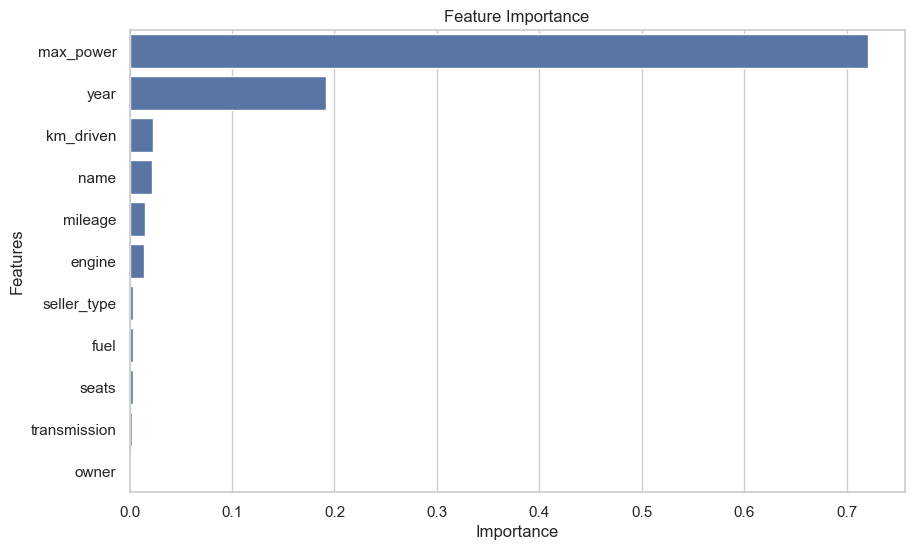

In [28]:
# Plotting feature importance for Random Forest (only if it is the best model)
if model_name == "Random Forest":
    feature_importance = rf_model.feature_importances_
    feature_names = X.columns
    indices = np.argsort(feature_importance)[::-1]

    # Plotting feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance[indices], y=[feature_names[i] for i in indices])
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

In [29]:
with open('label_encoders.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoders, encoder_file)